# Atividade 3

# Atividades Monte Carlo:

In [ ]:
#etapa 1 (Monte Carlo):
import random

def pi_monte_carlo(N):

    dentro_circulo = 0

    for _ in range(N):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)  # Gera pontos no quadrado [-1,1] x [-1,1]
        if x**2 + y**2 <= 1:  # Verifica se o ponto está dentro do círculo de raio 1
            dentro_circulo += 1

    estimativa_pi = 4 * (dentro_circulo / N)  # Calcula a estimativa de π
    return estimativa_pi

# Teste da função com diferentes valores de N
if __name__ == "__main__":
    for N in [100, 1000, 10000, 100000]:
        print(f"N = {N}, Estimativa de π: {pi_monte_carlo(N)}")

N = 100, Estimativa de π: 3.4
N = 1000, Estimativa de π: 3.132
N = 10000, Estimativa de π: 3.1332
N = 100000, Estimativa de π: 3.14264


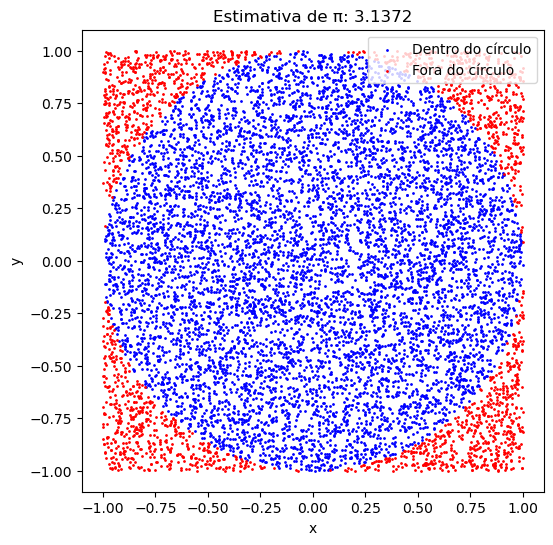

In [3]:
#etapa 2 (Monte Carlo):
import random
import matplotlib.pyplot as plt

def pi_monte_carlo(N, retorna_pontos=False):
    '''
  
    '''
    dentro = []
    fora = []
    pontos_dentro_circulo = 0

    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distancia = x**2 + y**2

        if distancia <= 1:
            pontos_dentro_circulo += 1
            dentro.append((x, y))
        else:
            fora.append((x, y))

    estimativa_pi = 4 * pontos_dentro_circulo / N

    if retorna_pontos:
        return estimativa_pi, dentro, fora
    else:
        return estimativa_pi

# Exemplo de uso:
N = 10000
estimativa_pi, dentro, fora = pi_monte_carlo(N, retorna_pontos=True)

# Plotando os pontos
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='blue', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='red', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Valores de N sendo testados: [     10     100    1000   10000  100000 1000000]

Parâmetros do ajuste (y = a*N^b):
a = 0.4266 ± 0.2912
b = -0.5109 ± 0.0801


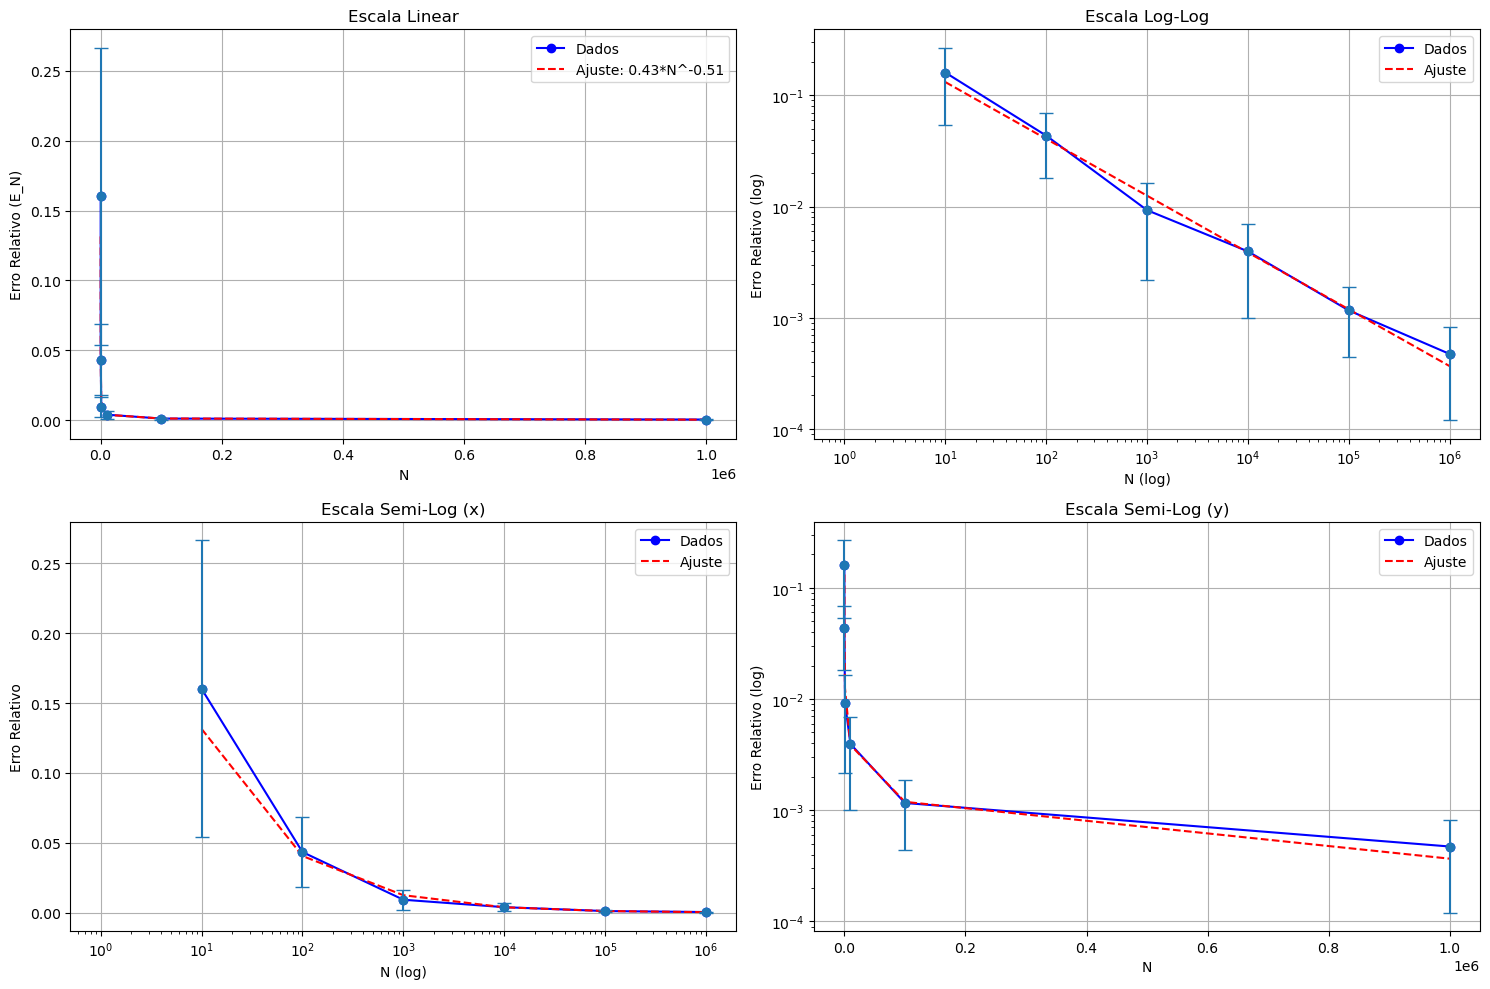


Análise:
1. O gráfico log-log mostra uma relação linear, indicando uma lei de potência.
2. O expoente b ≈ -0.5, o que sugere que E_N ∝ 1/√N (como esperado teoricamente).
3. As incertezas diminuem conforme N aumenta, como mostram as barras de erro.


In [4]:
#via Monte Carlo (etapa 3):
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

def pi_monte_carlo(N):

    dentro = 0
    for _ in range(N):
        x, y = np.random.uniform(-1, 1, 2)
        if x**2 + y**2 <= 1:
            dentro += 1
    return 4 * dentro / N

def calcular_erro_relativo(N_values, repeticoes=10):

    E_N_medio = []
    E_N_std = []

    for N in N_values:
        erros = []
        for _ in range(repeticoes):
            pi_estimado = pi_monte_carlo(N)
            erro_relativo = abs(math.pi - pi_estimado) / math.pi
            erros.append(erro_relativo)

        E_N_medio.append(np.mean(erros))
        E_N_std.append(np.std(erros))

    return np.array(E_N_medio), np.array(E_N_std)

def power_law(x, a, b):
    """Função de ajuste"""
    return a * x**b

def plot_resultados(N_values, E_N_medio, E_N_std, popt):

    plt.figure(figsize=(15, 10))

    # Escala linear
    plt.subplot(2, 2, 1)
    plt.plot(N_values, E_N_medio, 'bo-', label='Dados')
    plt.plot(N_values, power_law(N_values, *popt), 'r--',
             label=f'Ajuste: {popt[0]:.2f}*N^{popt[1]:.2f}')
    plt.errorbar(N_values, E_N_medio, yerr=E_N_std, fmt='o', capsize=5)
    plt.xlabel('N')
    plt.ylabel('Erro Relativo (E_N)')
    plt.title('Escala Linear')
    plt.legend()
    plt.grid(True)

    # Escala log-log
    plt.subplot(2, 2, 2)
    plt.loglog(N_values, E_N_medio, 'bo-', label='Dados')
    plt.loglog(N_values, power_law(N_values, *popt), 'r--', label='Ajuste')
    plt.errorbar(N_values, E_N_medio, yerr=E_N_std, fmt='o', capsize=5)
    plt.xlabel('N (log)')
    plt.ylabel('Erro Relativo (log)')
    plt.title('Escala Log-Log')
    plt.legend()
    plt.grid(True)

    # Escala semi-log x
    plt.subplot(2, 2, 3)
    plt.semilogx(N_values, E_N_medio, 'bo-', label='Dados')
    plt.semilogx(N_values, power_law(N_values, *popt), 'r--', label='Ajuste')
    plt.errorbar(N_values, E_N_medio, yerr=E_N_std, fmt='o', capsize=5)
    plt.xlabel('N (log)')
    plt.ylabel('Erro Relativo')
    plt.title('Escala Semi-Log (x)')
    plt.legend()
    plt.grid(True)

    # Escala semi-log y
    plt.subplot(2, 2, 4)
    plt.semilogy(N_values, E_N_medio, 'bo-', label='Dados')
    plt.semilogy(N_values, power_law(N_values, *popt), 'r--', label='Ajuste')
    plt.errorbar(N_values, E_N_medio, yerr=E_N_std, fmt='o', capsize=5)
    plt.xlabel('N')
    plt.ylabel('Erro Relativo (log)')
    plt.title('Escala Semi-Log (y)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    # Valores de N para testar (potências de 10)
    N_values = np.logspace(1, 6, 6).astype(int)
    print("Valores de N sendo testados:", N_values)

    # Calcula o erro relativo médio (com 10 repetições para cada N)
    E_N_medio, E_N_std = calcular_erro_relativo(N_values, repeticoes=10)

    # Ajuste dos dados a uma lei de potência
    popt, pcov = curve_fit(power_law, N_values, E_N_medio,
                          sigma=E_N_std, absolute_sigma=True,
                          p0=[1, -0.5])  # Chute inicial baseado na teoria

    print("\nParâmetros do ajuste (y = a*N^b):")
    print(f"a = {popt[0]:.4f} ± {np.sqrt(pcov[0,0]):.4f}")
    print(f"b = {popt[1]:.4f} ± {np.sqrt(pcov[1,1]):.4f}")

    # Plota os resultados
    plot_resultados(N_values, E_N_medio, E_N_std, popt)

    # Análise dos resultados
    print("\nAnálise:")
    print("1. O gráfico log-log mostra uma relação linear, indicando uma lei de potência.")
    print("2. O expoente b ≈ -0.5, o que sugere que E_N ∝ 1/√N (como esperado teoricamente).")
    print("3. As incertezas diminuem conforme N aumenta, como mostram as barras de erro.")

if __name__ == "__main__":
    main()

In [26]:
#Etapa 4:

import numpy as np

def pi_monte_carlo_vetorizado(N):
    pontos = np.random.uniform(-1, 1, size=(N, 2))

    distancias = np.sum(pontos**2, axis=1)

    dentro_circulo = np.sum(distancias <= 1)

    return 4 * dentro_circulo / N


if __name__ == "__main__":
    N_values = np.array([100, 1000, 10000, 100000])
    resultados = np.vectorize(pi_monte_carlo_vetorizado)(N_values)


    print(np.column_stack((N_values, resultados)))


[[1.0000e+02 3.2000e+00]
 [1.0000e+03 3.2280e+00]
 [1.0000e+04 3.1676e+00]
 [1.0000e+05 3.1380e+00]]


# Mapa Logístico:

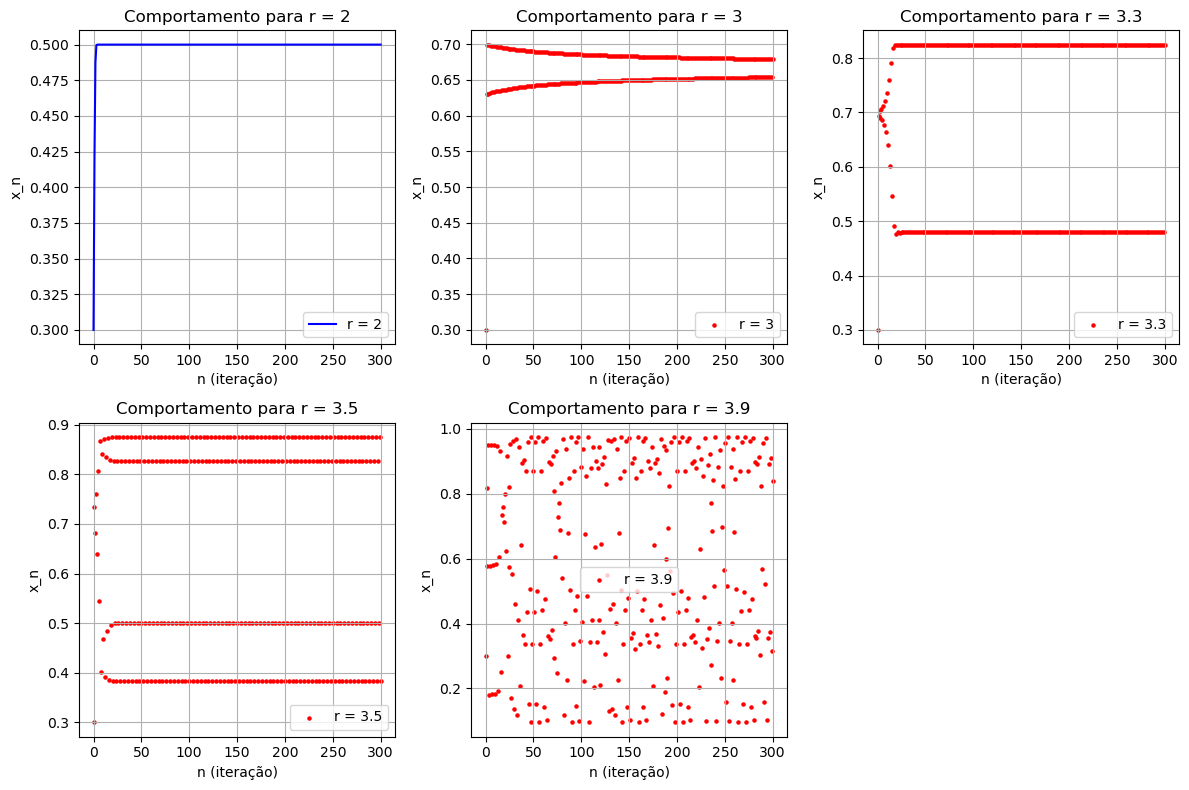

Análise do comportamento para diferentes valores de r:
1. r = 2.0 - O sistema converge rapidamente para um único ponto fixo.
2. r = 3.0 - O sistema oscila entre dois valores (bifurcação).
3. r = 3.3 - O sistema mostra comportamento periódico mais complexo.
4. r = 3.5 - O sistema começa a exibir comportamento caótico.
5. r = 3.9 - Comportamento completamente caótico, sem padrão discernível.


In [13]:
#mapa logístico etapa 1:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r, x0, N):
    """

    """
    x = np.zeros(N+1)
    x[0] = x0
    for n in range(1, N+1):
        x[n] = r * x[n-1] * (1 - x[n-1])
    return x

def plot_comportamento(r_values, x0=0.3, N=300):
    """

    """
    plt.figure(figsize=(12, 8))

    for i, r in enumerate(r_values):
        x = mapa_logistico(r, x0, N)

        plt.subplot(2, 3, i+1)
        if r == 2:
            plt.plot(range(N+1), x, 'b-', label=f'r = {r}')
        else:
            plt.scatter(range(N+1), x, s=5, c='r', label=f'r = {r}')

        plt.title(f'Comportamento para r = {r}')
        plt.xlabel('n (iteração)')
        plt.ylabel('x_n')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Valores de r para analisar
r_values = [2, 3, 3.3, 3.5, 3.9]

# Gerar os gráficos
plot_comportamento(r_values)

# Análise dos resultados
print("Análise do comportamento para diferentes valores de r:")
print("1. r = 2.0 - O sistema converge rapidamente para um único ponto fixo.")
print("2. r = 3.0 - O sistema oscila entre dois valores (bifurcação).")
print("3. r = 3.3 - O sistema mostra comportamento periódico mais complexo.")
print("4. r = 3.5 - O sistema começa a exibir comportamento caótico.")
print("5. r = 3.9 - Comportamento completamente caótico, sem padrão discernível.")

C:\Users\gfm050\AppData\Local\Temp\ipykernel_7500\1746311980.py:12: RuntimeWarning: overflow encountered in scalar multiply
  xn[n+1] = r * xn[n] * (1 - xn[n])


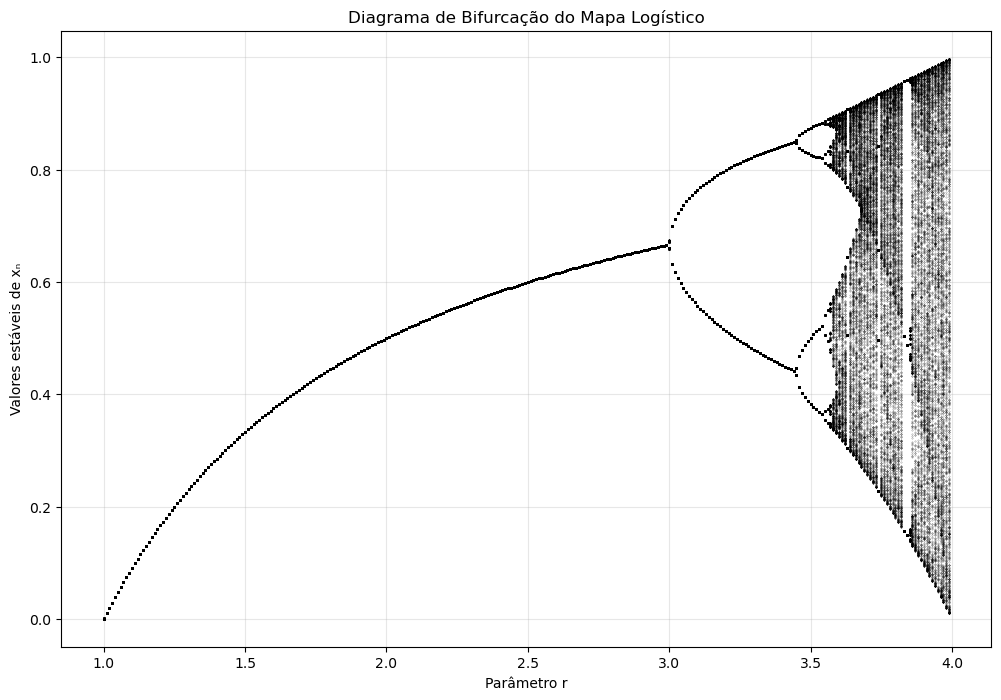

In [17]:
#caos  e fractais etapa 2:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r, x0, N):
    """
    Calcula a evolução do mapa logístico xn+1 = r * xn * (1 - xn)
    """
    xn = np.zeros(N+1)
    xn[0] = x0
    for n in range(N):
        xn[n+1] = r * xn[n] * (1 - xn[n])
    return xn

# Parâmetros da simulação
N = 2000  # Número total de iterações
M = 1000   # Número de pontos a serem plotados (últimos M)
x0 = 0.5   # Condição inicial

# Configuração do gráfico
plt.figure(figsize=(12, 8))
plt.title("Diagrama de Bifurcação do Mapa Logístico")
plt.xlabel("Parâmetro r")
plt.ylabel("Valores estáveis de xₙ")
plt.grid(True, alpha=0.3)

# Loop sobre os valores de r
for r in np.arange(1.0, 4.01, 0.01):  
    # Calcular a trajetória
    xn = mapa_logistico(r, x0, N)

    # Plotar os últimos M pontos
    plt.plot(r * np.ones(M), xn[-M:], 'k.', markersize=0.5, alpha=0.5)

plt.show()

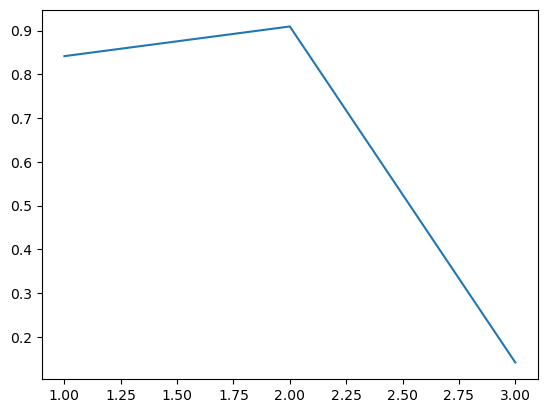

In [34]:
#Mapa logístico, caos e fractais (etapa 3) :
import numpy as np
import matplotlib.pyplot as plt

x=(1,2,3)
y= np.sin(x)

plt.plot(x,y)
plt.show()



In [14]:
matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

SyntaxError: invalid syntax (3635820881.py, line 1)